# Bias and Variance

The following tasks need to be accomplished in this laboratory session:

- **Verify that weights overshoot in Overfitting**: When we build a model that is too complex for the available data, overfitting happens. For example, if the dataset is very small or contains outliers (noise), a very complex model may learn unnecessary patterns in the data that are not useful for the task (classification or prediction), or may even learn the noise in the dataset, producing worse accuracy than a simpler model.

- **Calculate Bias and Variance for the predictions of overfit and underfit models, and try to identify any patterns.**

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

## Load a very simple dataset

> **Note**: This dataset is available in the repository.

In [3]:
df = pd.read_csv('./Salary.csv')
print(len(df))
df.head()

35


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


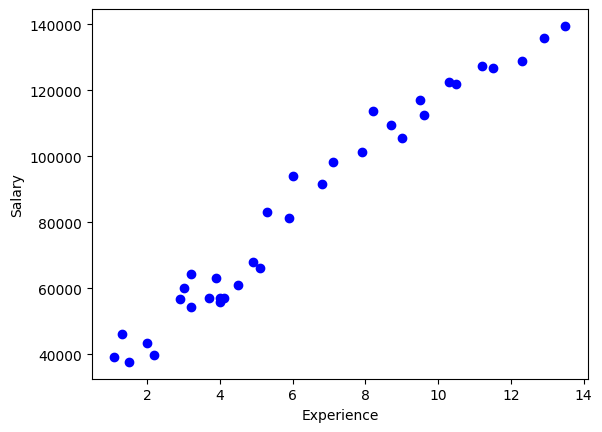

In [4]:
X = np.array(df['YearsExperience'].to_list()).flatten().tolist()
y = np.array(df['Salary'].to_list()).flatten().tolist()

plt.plot(X, y, 'ob')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

## Underfit

Let's fit a polynomial of degree 1 to the dataset. 
This is a case of underfitting, because it's clear from the plot that there is some non-linearity in the data. 
Look at the weights. They are on the order of 8,000–30,000.

Mean Absolute Error: 4976.718765130529
The learned weights are:
 
8732 x + 2.886e+04


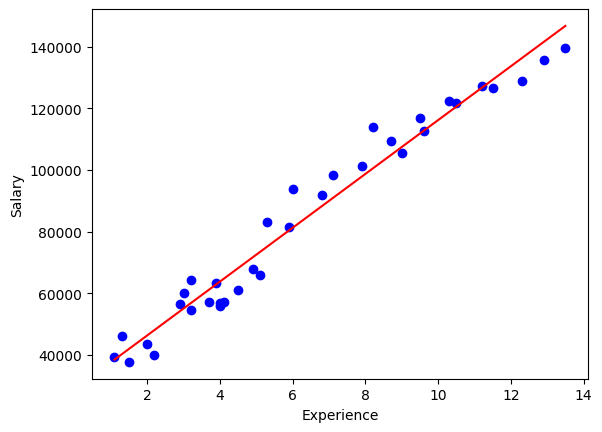

In [5]:
linear_coeffs = np.polyfit(X, y, 1)
linear_model = np.poly1d(linear_coeffs)
linear_preds = linear_model(X)
print(f"Mean Absolute Error: {mean_absolute_error(y, linear_preds)}")
print("The learned weights are:")
print(linear_model)

plt.plot(X, y, 'ob')
plt.plot(X, linear_preds, 'r')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

## Medium

If you try to imagine a curve over this dataset by moving your finger over the points, you may notice that you need to change direction 7 to 9 times. 
From this, you can gain intuition that fitting a 7-degree polynomial (for this range) will not overfit and will generalize well. 
Again, you'll notice that although the lower bound has reduced, the absolute weights are still around 30,000.

Mean Absolute Error: 3794.43329159009
The learned weights are:
           7          6         5         4        3             2
-0.007964 x - 0.2154 x + 20.21 x - 410.3 x + 3562 x - 1.395e+04 x + 3.101e+04 x + 1.748e+04


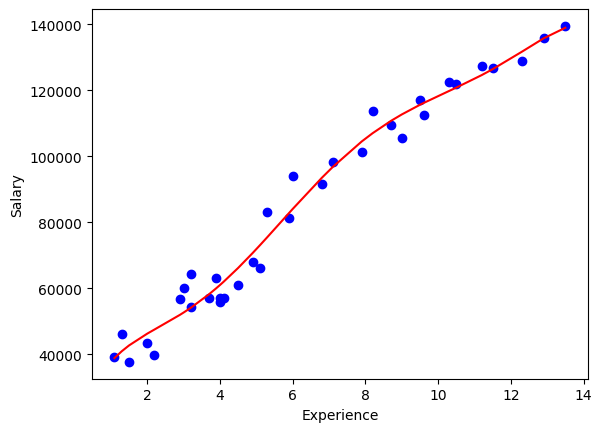

In [6]:
medium_coeffs = np.polyfit(X, y, 7)
medium_model = np.poly1d(medium_coeffs)
medium_preds = medium_model(X)
print(f"Mean Absolute Error: {mean_absolute_error(y, medium_preds)}")
print("The learned weights are:")
print(medium_model)

plt.plot(X, y, 'ob')
plt.plot(X, medium_preds, 'r')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

## Overfit

Let's fit a polynomial of very high degree to the data to learn the relationship and achieve much better training accuracy. 
You'll see that we can predict many points very accurately, and the training error will be much lower than the previous two models. 
However, look at the weights of the 34-degree polynomial. 
You'll notice that the weights range from $10^{-24}$ all the way to $10^{8}$, which is not a good sign. 
Our model has overfitted to the data and has lost its generalization capabilities.

Mean Absolute Error: 2237.3418910093606
The learned weights are:
            34             33             32            31
-1.349e-24 x  + 4.758e-23 x  - 1.004e-22 x  - 7.76e-21 x 
              30             29             28             27
 - 5.125e-20 x  + 8.216e-19 x  + 2.026e-17 x  + 1.247e-16 x 
              26             25             24            23
 - 2.136e-15 x  - 5.611e-14 x  - 4.083e-13 x  + 5.22e-12 x 
              22             21             20             19
 + 1.576e-10 x  + 1.148e-09 x  - 1.664e-08 x  - 4.444e-07 x 
              18             17            16            15          14
 - 1.783e-06 x  + 7.243e-05 x  + 0.001029 x  - 0.007234 x  - 0.2522 x 
           13         12         11        10             9
 + 0.7128 x  + 52.36 x  - 318.5 x  - 8435 x  + 1.738e+05 x
              8             7             6             5             4
 - 1.633e+06 x + 9.653e+06 x - 3.907e+07 x + 1.112e+08 x - 2.225e+08 x
              3            2
 + 3.058e+08 x - 

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_35104\3332624267.py:1: RankWarning: Polyfit may be poorly conditioned
  overfit_coeffs = np.polyfit(X, y, 34)


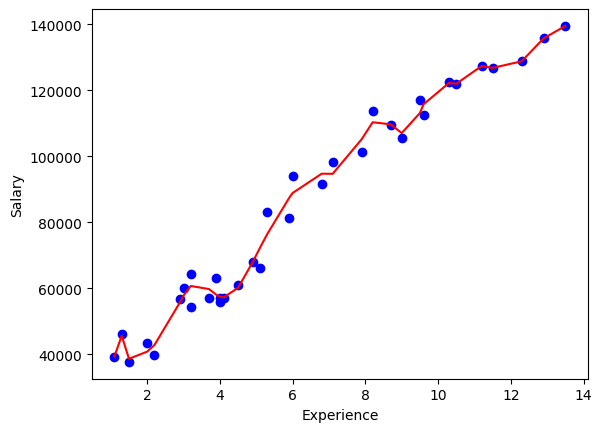

In [7]:
overfit_coeffs = np.polyfit(X, y, 34)
overfit_model = np.poly1d(overfit_coeffs)
overfit_preds = overfit_model(X)
print(f"Mean Absolute Error: {mean_absolute_error(y, overfit_preds)}")
print("The learned weights are:")
print(overfit_model)

plt.plot(X, y, 'ob')
plt.plot(X, overfit_preds, 'r')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

## Bias and variance plot 

From the above examples, we can see that we cannot judge a model based solely on simple metrics like Mean Absolute Error (MAE). 
We require another powerful metric that can judge the generalization capabilities of a model as well. 
Here comes the **bias-variance decomposition of Mean Squared Error (MSE)**.

Bias and variance are calculated as follows:

$$\text{Bias}^2 = \mathbb{E}\left[(y - \mathbb{E}[\hat{f}(x)])^2\right]$$

$$\text{Variance} = \mathbb{E}\left[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2\right]$$

$$\text{MSE} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$

Since our dataset is very small, we will use the same dataset for training as well as testing (i.e., `X_train` = `X_test` and `y_train` = `y_test`). You'll notice that the MSE becomes very high, as shown in the plot below, when the model starts overfitting.

> **Note**: You might get the same warnings from `np.polyfit` as I did, since for a polynomial of degree $n$, $n + 1$ **distinct** points are required. When we sample randomly, the chance of repeated samples grows as the degree increases, provided the size of the dataset is constant. 

C:\Users\ujjwa\AppData\Local\Temp\ipykernel_35104\334323221.py:10: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_sample, y_sample, degree)
C:\Users\ujjwa\AppData\Local\Temp\ipykernel_35104\334323221.py:10: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_sample, y_sample, degree)
C:\Users\ujjwa\AppData\Local\Temp\ipykernel_35104\334323221.py:10: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_sample, y_sample, degree)
C:\Users\ujjwa\AppData\Local\Temp\ipykernel_35104\334323221.py:10: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_sample, y_sample, degree)
C:\Users\ujjwa\AppData\Local\Temp\ipykernel_35104\334323221.py:10: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_sample, y_sample, degree)
C:\Users\ujjwa\AppData\Local\Temp\ipykernel_35104\334323221.py:10: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_sample, y_sample, degree)
C:\Users\ujjwa\A

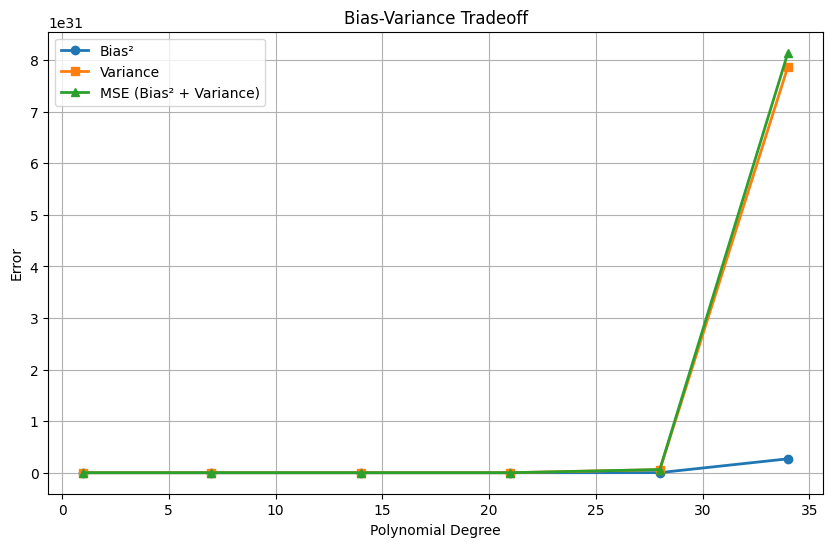

In [ ]:
def bias_and_variance_bootstrap(X_train, y_train, X_test, y_test, degree, runs = 30):
    preds = []
    n = len(X_train)

    for _ in range(runs):
        idx = np.random.choice(n, n, replace=True)
        X_sample = np.array(X_train)[idx]
        y_sample = np.array(y_train)[idx]

        # may give some warnings
        coeffs = np.polyfit(X_sample, y_sample, degree)
        model = np.poly1d(coeffs)
        y_pred = model(X_test)
        preds.append(y_pred)
    
    preds = np.array(preds)
    y_pred_mean = preds.mean(axis = 0)

    bias_sq = ((np.array(y_test) - y_pred_mean) ** 2).mean()
    variance = preds.var()
    total_error = bias_sq + variance

    return bias_sq, variance, total_error

degrees = [1, 7, 14, 21, 28, 34]
biases = []
variances = []
total_errors = []

X_test = np.array(X)
y_test = np.array(y)

for degree in degrees:
    bias, variance, total_error = bias_and_variance_bootstrap(X, y, X_test, y_test, degree, runs=30)
    biases.append(bias)
    variances.append(variance)
    total_errors.append(total_error)
    
plt.figure(figsize=(10, 6))
plt.plot(degrees, biases, 'o-', label="Bias²", linewidth=2)
plt.plot(degrees, variances, 's-', label="Variance", linewidth=2)
plt.plot(degrees, total_errors, '^-', label="MSE (Bias² + Variance)", linewidth=2)
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.title('Bias-Variance Tradeoff')
plt.show()